In [48]:
import pandas as pd
import numpy as np

In [49]:
data = pd.read_csv('uber.csv')

In [50]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [52]:
data.shape

(200000, 9)

In [53]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [54]:
data.drop(['Unnamed: 0', 'key'], axis = 1, inplace = True)

In [55]:
data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [56]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [57]:
data.dropna(inplace = True)

In [58]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [62]:
data.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [63]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], errors = 'coerce')

In [64]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [17]:
data.drop('pickup_datetime', axis = 1, inplace = True)

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

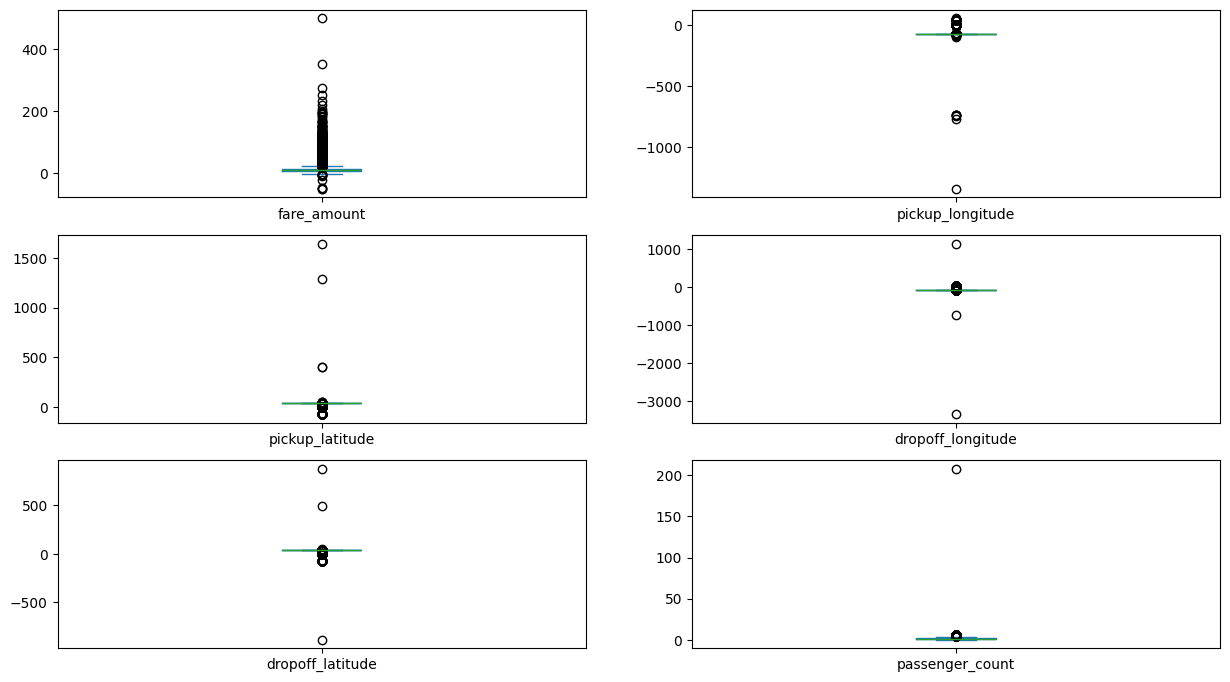

In [18]:
data.plot(kind = 'box', subplots = True, layout = (7, 2), figsize = (15, 20))

In [19]:
import seaborn as sns

<Axes: >

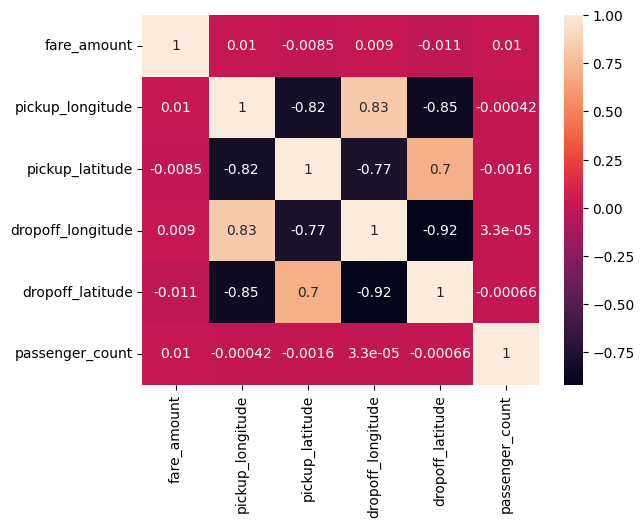

In [20]:
sns.heatmap(data.corr(), annot = True)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = data.drop('fare_amount', axis = 1)
y = data.fare_amount

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regression_model = LinearRegression()

In [26]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = regression_model.predict(X_test)

In [28]:
y_pred

array([11.29237916, 11.29171388, 11.5718662 , ..., 11.29183291,
       11.43252639, 11.29190248])

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
r2_score(y_test, y_pred)

0.00034152697863043535

In [31]:
np.sqrt(mean_squared_error(y_test, y_pred))

10.197470623964248

In [38]:
# Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
model = RandomForestRegressor(n_estimators = 100)

In [34]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
y_pred = model.predict(X_test)

In [36]:
y_pred

array([ 9.8547,  5.194 , 12.162 , ...,  5.541 , 11.026 ,  7.644 ])

In [39]:
# Matrics Evaluation for Random Forest

In [40]:
R2_Random = r2_score(y_test,y_pred)

In [41]:
R2_Random

0.703011583042892

In [42]:
MSE_Random = mean_squared_error(y_test, y_pred)

In [43]:
MSE_Random

30.893903515950182

In [44]:
MSE_Random = np.sqrt(MSE_Random)

In [45]:
MSE_Random

5.558228451219883